In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import IPython.display as display
import os

from classes import *
from gen_utils import *
from tqdm import tqdm
from utils import *

# fix the seed for reproducibility
random.seed(6667)
np.random.seed(6667)


# minihack env creation with a .des file

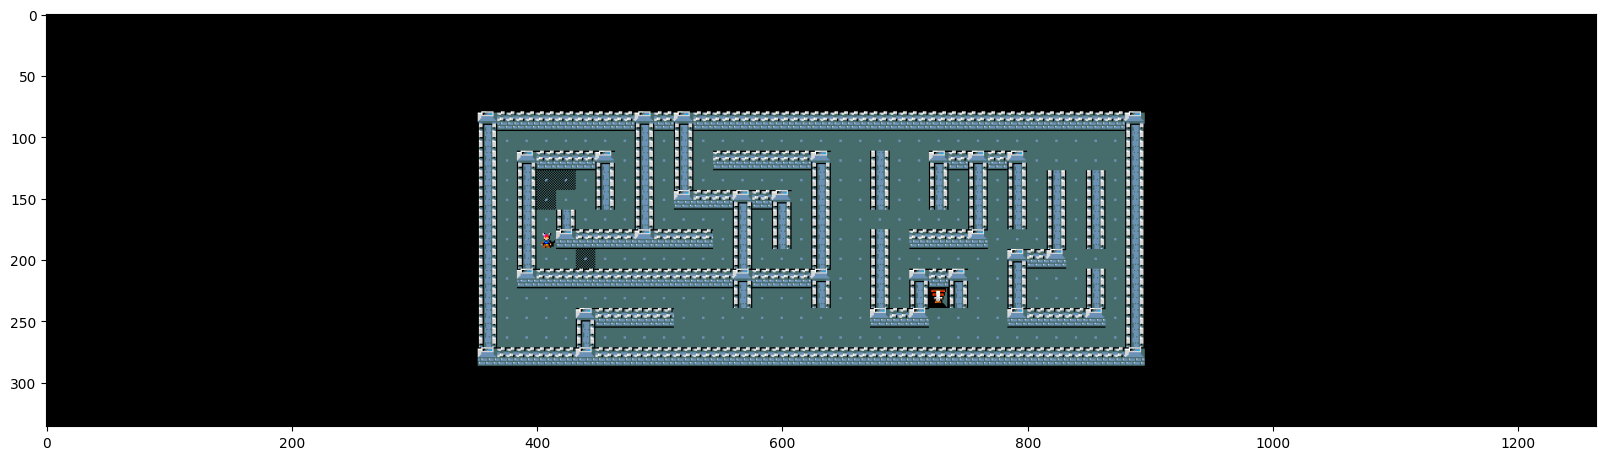

In [3]:
plt.rcParams['figure.figsize'] = [20, 7]
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "maps/irene.des",
    max_episode_steps=10000
)
state = env.reset()
#env.render()
plt.imshow(state['pixel'])

In [4]:
state = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

map = Map(game_map, start, target)

In [5]:
print(f"> start: {map.start}, target: {map.target}")

> start: (11, 25), target: (14, 45)


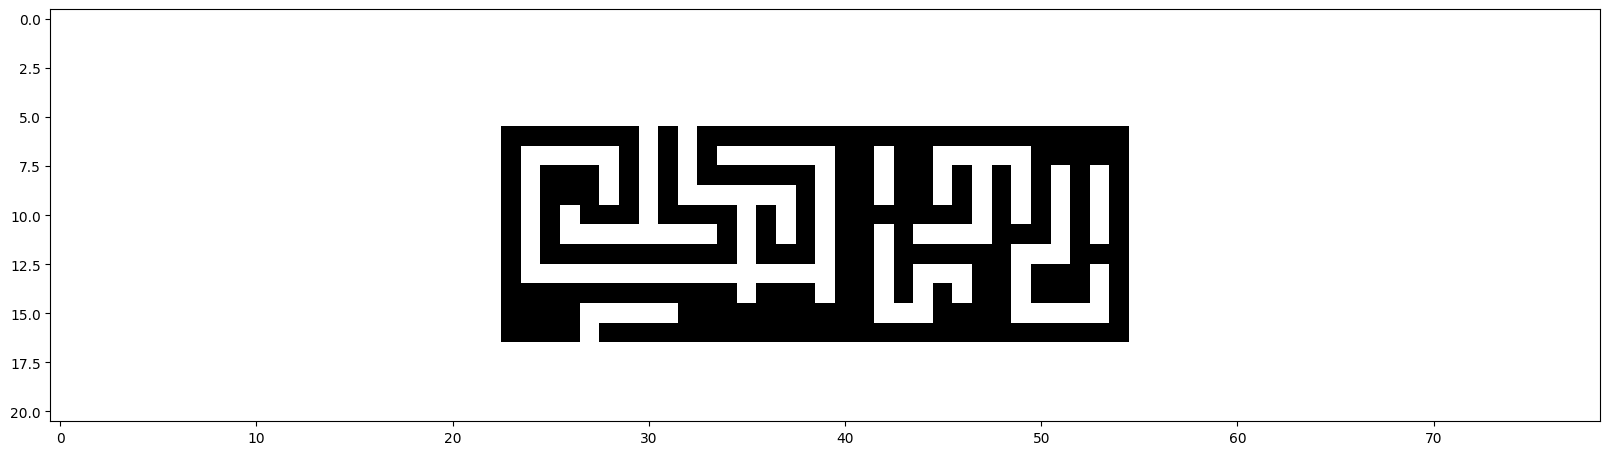

In [6]:
# print the map_matrix with matplotlib where the walls are black and the floor is white
plt.imshow(map.map_matrix, cmap='gray')
plt.show()


In [7]:
# show the size of the map
print(f"> map size: {map.game_map.shape}")

> map size: (21, 79)


In [8]:
from pyswip import Prolog


In [9]:
PATH = 'kb/kb.pl'
KB = Prolog()
KB.consult(PATH)

In [10]:
KB.retractall("maze(_)")
KB.retractall("start(_,_)")
KB.asserta(f'maze({map.map_matrix})')
KB.asserta(f'start({map.start[0]}, {map.start[1]})')

In [11]:
for i in KB.query("maze(X)"):
    print(f'{i["X"]}\n')

#list(KB.query("maze(X)"))


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# NTH1

In Prolog, `nth1/3` is a built-in predicate that is used to access elements in a list by index. The `nth1/3` predicate has the following form:

```prolog
nth1(Index, List, Element)
```
Index: The index of the element you want to access.

List: The list from which you want to access the element.

Element: The variable that will be unified with the element at the specified index.


In [12]:
result = list(KB.query("maze(M), nth1(14, M, Row), nth1(23, Row, Cell)"))
if result:
    cell_value = result[0]["Cell"]
    print(f"Cell value: {cell_value}")
else:
    print("Query result is empty.")

Cell value: 1


In [13]:
list(KB.query("start(ROW,COL)"))

[{'ROW': 11, 'COL': 25}]

In [14]:
list(KB.query(f"is_valid(10,23)"))

[]

In [15]:
list(KB.query(f"is_valid(9,23)"))

[]

In [16]:
solution = list(KB.query(f"is_valid(14,23)"))
if solution:
    print("Position is valid.")
else:
    print("Position is not valid.")

Position is not valid.


In [17]:
list(KB.query(f"is_valid_action(11,23,0)"))

[]

In [18]:
list(KB.query(f"is_valid_action(10,23,0)"))

[]

In [19]:
#individual = Individual(random_nactions(), 1, map)

In [20]:
#individual.path[0] == map.start

# We have to decide if we want to generate a random path or random actions

random path $\Rightarrow$ a path of exactly n steps

random actions $\Rightarrow$ many action will be not valid $\Rightarrow$ the path will be shorter OR, as is implemented now, with many repetition of the same position.

# NOTE:
minihack wont crash if we input a not valid action starting from a valid action. It will simply not execute the action (as if we are playing), hence we are updating the path position with the same position.

In [21]:
# create first generation
MAX_GENERATIONS = 700
MAX_INDIVIDUALS = 80
best_individuals = []

print("> Creating initial population...")
individuals = [Individual(random_nactions(300), 1, map) for _ in range(MAX_INDIVIDUALS)]
individuals.sort(key=lambda x: x.fitness, reverse=True)
#print(f'best_individual: {individuals[0].fitness}')
print("> Evolving...")

for generation in tqdm(range(MAX_GENERATIONS)):

    best_fitness = individuals[0].fitness
    best_individuals.append(individuals[0]) 
    if generation % 25 == 0:
        print( 
            format_loop.format(
                generation, 
                best_fitness, 
                individuals[0].wrong_actions, 
                individuals[0].path.loops, 
                individuals[0].path.dead_ends, 
                individuals[0].distance
            ) 
        )

    # take 2 best individuals -> maybe can be replaced with probability distribution based on fitness
    # also roulette wheel selection.
    child1, child2 = individuals[0].actions, individuals[1].actions
    offspring = [crossover_uniform(child1, child2) for _ in range(MAX_INDIVIDUALS)]
    offspring = [mutate(child, valid_actions_bitmap(map.start, path_from_actions(map.game_map, map.start, child))) for child in offspring]

    individuals[2:] = [Individual(offspring[i], generation+1, map) for i in range(MAX_INDIVIDUALS-2)]
    individuals.sort(key=lambda x: x.fitness, reverse=True)
    # if fitness is 0, then we found the solution
    if individuals[0].fitness == 0:
        print(f'best_individual in generation {generation}: {individuals[0].fitness}, wrong actions: {individuals[0].wrong_actions}')
        break

best_fitness = individuals[0].fitness
best_individuals.append(individuals[0])
print(f'best_individual in generation {generation}: {best_fitness}, wrong actions: {individuals[0].wrong_actions}')

> Creating initial population...
> Evolving...


  0%|          | 1/700 [00:00<01:59,  5.86it/s]

best_individual in generation 0: fitness: -14, wrong actions: 157, loops: 266, dead_ends: 29, distance: 14


  4%|▍         | 27/700 [00:04<01:55,  5.85it/s]

best_individual in generation 25: fitness: -2, wrong actions: 87, loops: 212, dead_ends: 0, distance: 2


  4%|▍         | 30/700 [00:05<01:57,  5.72it/s]

best_individual in generation 30: 0, wrong actions: 88
best_individual in generation 30: 0, wrong actions: 88


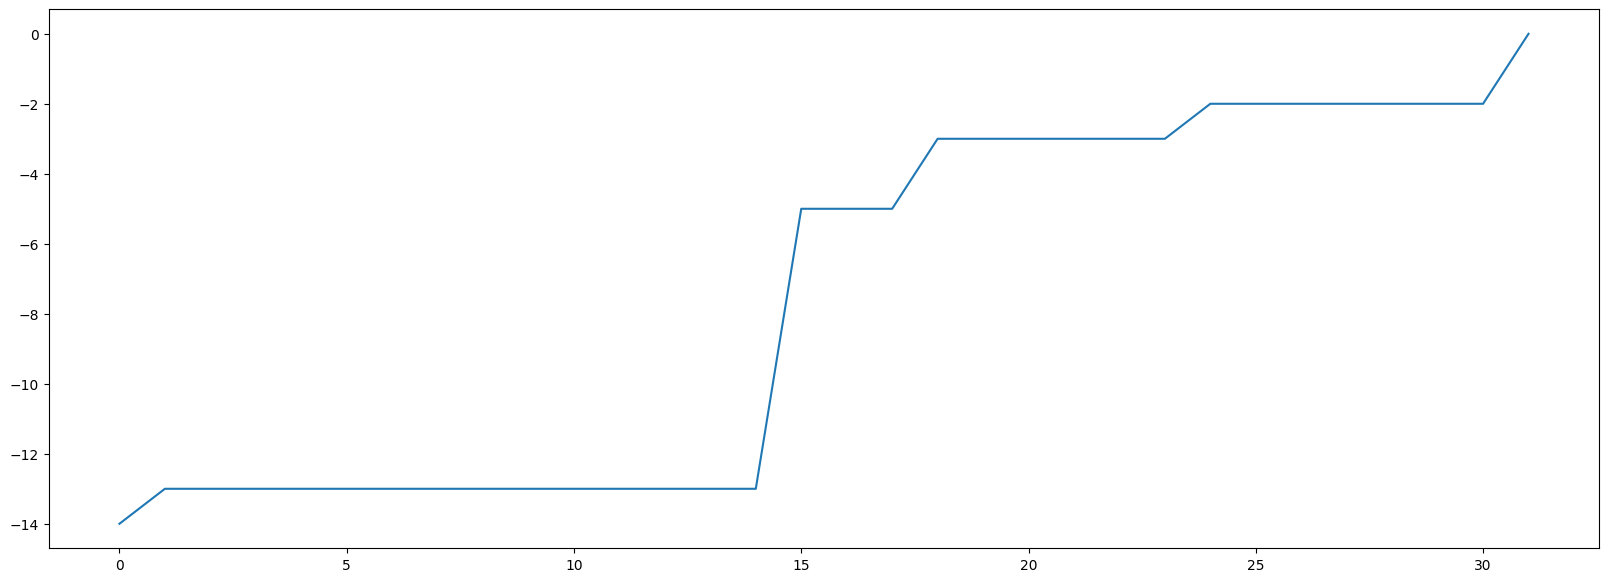

In [23]:
# Plot for each generation the best fitness
best_fitness = [best_individuals[i].fitness for i in range(len(best_individuals))]
plt.plot(best_fitness)

YOU WON! <3


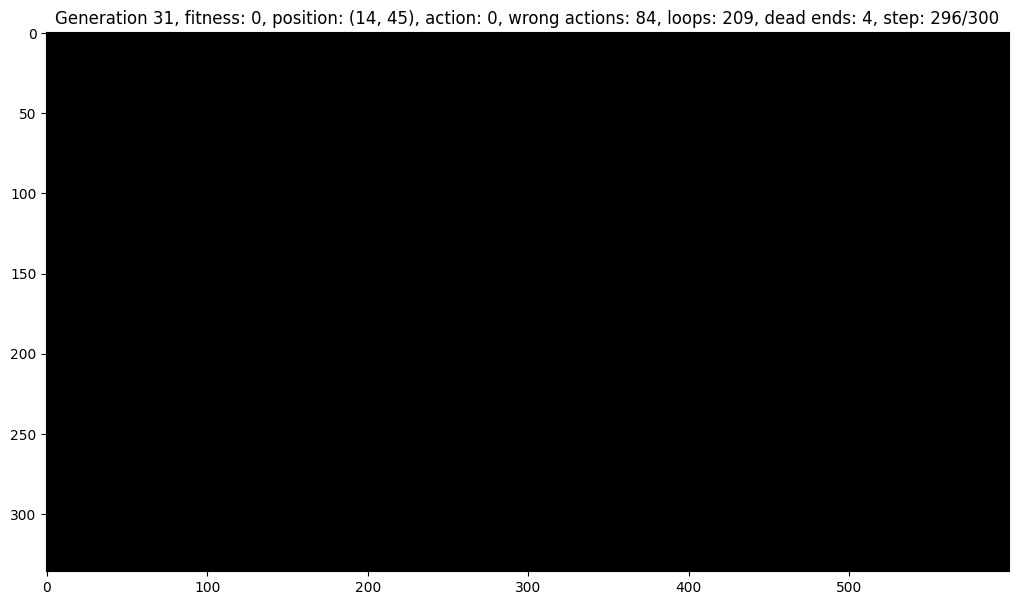

In [24]:
env.reset()
plt.rcParams['figure.figsize'] = [18, 7]

image = plt.imshow(game[:, 300:900])
# for generation, path in enumerate(best_paths):
# plt.title(f"Generation {generation}, fitness: {best_scores[generation]:.2f}, last move: {path[-1]}")
#start = best_paths[0]
#path = best_paths[-1]
actions = []
actions = individuals[0].actions
wrong = 0

for i, action in enumerate(actions):
    try: 
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.title(
            format_title.format(
                individuals[0].generation, 
                individuals[0].fitness, 
                individuals[0].path[i], 
                action, 
                wrong, 
                individuals[0].path.loops, 
                individuals[0].path.dead_ends, 
                i+1, len(actions)
            )
        )
        image.set_data(s['pixel'][:, 300:900])
        #time.sleep(0.1)
        if individuals[0].path[i] == map.target:
            print('YOU WON! <3')
            break
        if individuals[0].path[i] == individuals[0].path[i-1]:
            wrong += 1
    except RuntimeError:
        print('YOU WON! <3')